Analysis of mutual funds in India

By Ayush Agarwal
IIT BHU ECE 24


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_excel('/content/mutual fund past year returns.xlsx',sheet_name='Sheet5')
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

In [24]:
df.head()

,Scheme name,2023,2022,2021,2020,2019
0,Nippon India Strategic Debt Fund Medium Duration,0.0762,0.0260,0.1809,-0.2307,-0.0259
1,JM Flexicap Fund Flexi Cap,0.4155,0.0869,0.3398,0.1225,0.1754
2,Aditya Birla Sun Life Medium Term Fund Medium ...,0.0769,0.2573,0.0769,0.0894,-0.0378
3,ICICI Prudential Income Optimizer Fund (FOF) H...,0.1529,0.0768,0.1141,0.0987,0.0914
4,Quant Focused Fund Focused,0.3034,0.1181,0.3860,0.2538,0.0422


In [25]:
# check for missing values (which I already removed in excel but just double checking)
# An inherent survivorship bias is that I am not taking any recent mutual fund which didnt exist atleast since 5 yrs
# But this bias is ok to me since I need experienced ppl handling my money duh
df.isnull().sum()

Scheme name    0
2023           0
2022           0
2021           0
2020           0
2019           0
dtype: int64

In [26]:
# finding all the numerical columns and putting in an array so that I can iterate over them easily
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html
print(df.select_dtypes(include='number').columns)

num_cols = df.select_dtypes(include='number')

# Since formula is (1+r/100) so I'm adding 1
for i in num_cols:
  df[i] = df[i] + 1

# just checking whether 1 was added or not
print(df.head())

Index([2023, 2022, 2021, 2020, 2019], dtype='object')
                                         Scheme name    2023    2022    2021  \
0   Nippon India Strategic Debt Fund Medium Duration  1.0762  1.0260  1.1809   
1                         JM Flexicap Fund Flexi Cap  1.4155  1.0869  1.3398   
2  Aditya Birla Sun Life Medium Term Fund Medium ...  1.0769  1.2573  1.0769   
3  ICICI Prudential Income Optimizer Fund (FOF) H...  1.1529  1.0768  1.1141   
4                         Quant Focused Fund Focused  1.3034  1.1181  1.3860   

     2020    2019  
0  0.7693  0.9741  
1  1.1225  1.1754  
2  1.0894  0.9622  
3  1.0987  1.0914  
4  1.2538  1.0422  


I will take end of 2021 as border line for decision
All data before it is considered past data and all after it would be future data

In [41]:
# import math
df['past_3_yr_return'] = 100*((df[2021]*df[2020]*df[2019])**(1/3)-1)
df['past_1_yr_return'] = 100*(df[2021]-1)
df['future_2_yr_return'] = 100*((df[2022]*df[2023])**0.5 -1 )

print(df.head())

                                         Scheme name    2023    2022    2021  \
0   Nippon India Strategic Debt Fund Medium Duration  1.0762  1.0260  1.1809   
1                         JM Flexicap Fund Flexi Cap  1.4155  1.0869  1.3398   
2  Aditya Birla Sun Life Medium Term Fund Medium ...  1.0769  1.2573  1.0769   
3  ICICI Prudential Income Optimizer Fund (FOF) H...  1.1529  1.0768  1.1141   
4                         Quant Focused Fund Focused  1.3034  1.1181  1.3860   

     2020    2019  past_3_yr_return  past_1_yr_return  future_2_yr_return  
0  0.7693  0.9741         -3.992727             18.09            5.080027  
1  1.1225  1.1754         20.912352             33.98           24.036565  
2  1.0894  0.9622          4.122048              7.69           16.360920  
3  1.0987  1.0914         10.135945             11.41           11.420048  
4  1.2538  1.0422         21.893586             38.60           20.719988  


[]

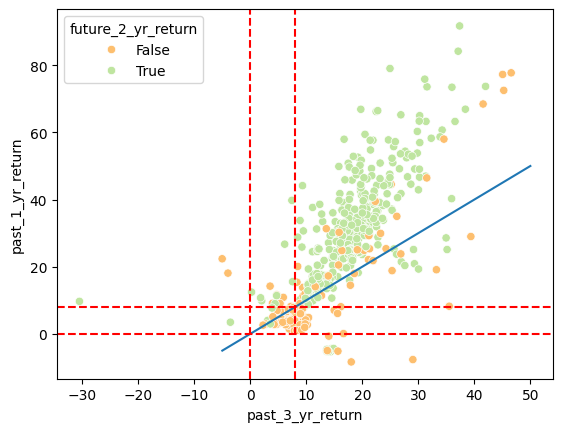

In [52]:
assumed_avg_inflation_rate = 8
sns.scatterplot(x=df['past_3_yr_return'],y=df['past_1_yr_return'],hue=(df['future_2_yr_return']>assumed_avg_inflation_rate),palette='Spectral')
# https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette for colours
x = np.linspace(-5,50,1000)
y = x
plt.plot(x,y)
plt.axvline(x=0, color='red', linestyle='--')
plt.axvline(x=assumed_avg_inflation_rate, color='red', linestyle='--')
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=assumed_avg_inflation_rate, color='red', linestyle='--')
plt.plot()

In [54]:
# assumed_avg_inflation_rate = 8
# sns.scatterplot(x=df['past_3_yr_return'],y=df['past_1_yr_return'],hue=(df['future_2_yr_return']>assumed_avg_inflation_rate),palette='Spectral')
# # https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette for colours
# x = np.linspace(-5,50,1000)
# y = x
# plt.plot(x,y)
# plt.axvline(x=0, color='red', linestyle='--')
# plt.axvline(x=assumed_avg_inflation_rate, color='red', linestyle='--')
# plt.axhline(y=0, color='red', linestyle='--')
# plt.axhline(y=assumed_avg_inflation_rate, color='red', linestyle='--')
# plt.plot()

for i in range(1,12):
  assumed_avg_inflation_rate = i
  sns.scatterplot(x=df['past_3_yr_return'],y=df['past_1_yr_return'],hue=(df['future_2_yr_return']>assumed_avg_inflation_rate),palette='Spectral')
  # https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette for colours
  x = np.linspace(-5,50,1000)
  y = x
  plt.plot(x,y)
  plt.axvline(x=0, color='red', linestyle='--')
  plt.axvline(x=assumed_avg_inflation_rate, color='red', linestyle='--')
  plt.axhline(y=0, color='red', linestyle='--')
  plt.axhline(y=assumed_avg_inflation_rate, color='red', linestyle='--')
  plt.plot()
  plt.savefig('inflation_'+str(i)+'.jpg')
  plt.close()

In [56]:
# MAKING GIF AUTOMATICALLY OUT OF THE IMAGES
from PIL import Image, ImageDraw
import imageio
images_data = []
for i in range(1,12):
  data = imageio.imread('/content/inflation_'+str(i)+'.jpg')
  images_data.append(data) #'simple_option'+str(i)+'.jpeg'

# print(images_data)
giffile = 'mf_reaction_with_varying_inflation.gif'
imageio.mimwrite(giffile, images_data, format= '.gif', fps = 1)


<ipython-input-56-c79c76b74770>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  data = imageio.imread('/content/inflation_'+str(i)+'.jpg')
